In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures

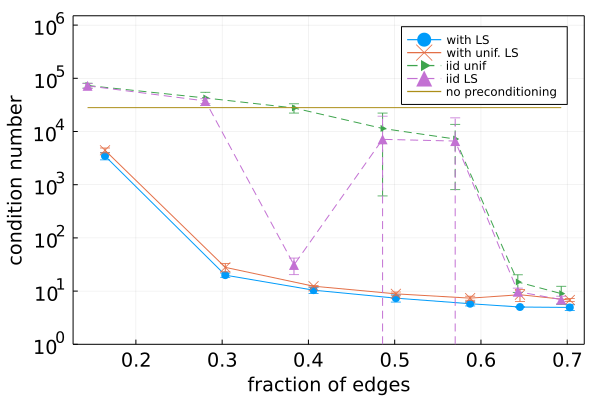

In [12]:

c = [10 5;
10 5]
n = [100 ; 100]

g =  stochastic_block_model(c, n)

rng = Random.default_rng()


meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.001
n_tot = 7
n_rep = 3

D = cond_numbers(meta_g,q,n_tot,n_rep,rng)

plot(D["percent_edges"],D["cnd_number"],yerror=D["cnd_number_std"], yaxis=:log,xlabel = "fraction of edges",labels = "with LS",markerstrokecolor=:auto,markershape=:circle,markersize = 5)

plot!(D["percent_edges"],D["cnd_number_no_lev"],yerror=D["cnd_number_no_lev_std"], yaxis=:log,labels = "with unif. LS",markerstrokecolor=:auto,markershape=:xcross,markersize = 5)

plot!(D["percent_edges_iid"],D["cnd_number_iid_unif"],yerror=D["cnd_number_iid_unif_std"], yaxis=:log,labels = "iid unif",markerstrokecolor=:auto,markershape=:rtriangle,markersize = 5,linestyle=:dash)

plot!(D["percent_edges_iid"],D["cnd_number_iid_lev"],yerror=D["cnd_number_iid_lev_std"], yaxis=:log,labels = "iid LS",markerstrokecolor=:auto,markershape=:utriangle,markersize = 5,linestyle=:dash)


plot!(D["percent_edges_iid"],cond(L + q * I)*ones(n_tot,1),labels = "no preconditioning",ylabel = "condition number",xtickfontsize=13,ytickfontsize=13,xguidefontsize=13,yguidefontsize=13,legendfontsize=10, framestyle = :box,margins = 0.1*2Plots.cm)
ylims!((1e0,1.5*1e6))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])